<a href="https://colab.research.google.com/github/mrunalkute/DS-Machine-Learning-Assignments/blob/Homework/assignment_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression is used when the output variable is continuous and numerical, such as predicting stock prices, temperatures, or sales figures. For example, in predicting a house price, regression will output a specific value. On the other hand, classification is used when the output variable is categorical, meaning it belongs to one of several classes or categories. For instance, classifying emails as "spam" or "not spam," or predicting whether a patient has a certain disease (yes or no).

2. A confusion table is used to evaluate classification models by comparing predicted labels to true labels. It includes four metrics: True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN). The confusion matrix helps identify where the model makes errors and assess performance balance across classes. Metrics like precision, recall, F1-score, and accuracy are derived from it.

3. SSE quantifies the total error in a model’s predictions by summing the squared differences between the observed values (real data) and the predicted values (model’s output). The larger the SSE, the worse the model is at fitting the data. SSE is commonly used in regression tasks to assess the fit of the model to the data, with lower values indicating better model performance. It penalizes larger errors more heavily due to the squaring of difference.

4. Overfitting occurs when the model learns the training data too well, including noise and outliers, and performs very well on training data but poorly on unseen test data. It means the model has become too complex and is not generalizing well to new data. Likewise, underfitting happens when the model is too simple to capture the underlying patterns in the data. It may have high bias and may not perform well even on training data, let alone test data. Underfitting often indicates that the model is not complex enough to capture the true relationships between variables.

5. Splitting the data into training and testing sets is crucial for evaluating a model’s generalizability. The training set is used to fit the model, and the testing set is used to assess its performance on unseen data. This helps to detect overfitting. Evaluating performance, such as accuracy or SSE, on the test set provides an unbiased estimate of how the model will perform in real-world scenarios. Selecting the optimal model and parameters (like k in k-nearest neighbors) based on test set performance ensures the model is not just memorizing the data (overfitting) but can generalize well.

6. Class label prediction provides a clear, binary or multiclass output where the model assigns one specific class to an observation. This is more intuitive but doesn’t capture the uncertainty in the model’s decision-making process.
Meanwhile, probability distribution outputs probabilities for each class, offering insight into the model's uncertainty about its predictions. For example, a classifier might predict that an email is 80% likely to be spam and 20% likely to be non-spam. This approach can be more informative for decision-making, especially when the cost of making an incorrect decision varies depending on the class probabilities. However, it is more complex and might be harder to interpret, especially for non-technical users.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [ ]:
# Cloned the assignment
! git clone https://github.com/ds3001f25/knn_assignment.git

Cloning into 'knn_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 7 (from 1)
Receiving objects: 100% (9/9), 854.33 KiB | 6.47 MiB/s, done.


In [ ]:
#Question 2.1: Load the Data

#Import packages
import pandas as pd
#Upload files
from google.colab import files
uploaded = files.upload()

#Read the file
df = pd.read_csv('./USA_cars_datasets.csv')

#Keep only the specified columns and drop others
df = df[['price', 'year', 'mileage']]

#Check for missing values (NA's)
na_check = df.isna().sum()

#Check the dimensions and shape
df_head = df.head()
df_dimensions = df.shape

#Print out
print("DataFrame Head:\n", df_head)
print("\nDataFrame Dimensions:", df_dimensions)
print("\nMissing Values (NA's):\n", na_check)

Saving USA_cars_datasets.csv to USA_cars_datasets (2).csv
DataFrame Head:
    price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654

DataFrame Dimensions: (2499, 3)

Missing Values (NA's):
 price      0
year       0
mileage    0
dtype: int64


Question 2.1:

There are no more NAs to handle!

In [ ]:
#Question 2.2: Maxmin Year and Mileage

#Max-Min normalization using formala for "year" and "mileage" variables
df['year'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min())
df['mileage'] = (df['mileage'] - df['mileage'].min()) / (df['mileage'].max() - df['mileage'].min())

#Check the first few rows and make sure the dimensions look okay for everything
df_head = df.head()
df_dimensions = df.shape

#Print out
print("DataFrame Head:\n", df_head)
print("\nDataFrame Dimensions:", df_dimensions)


DataFrame Head:
    price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537

DataFrame Dimensions: (2499, 3)


In [ ]:
#Question 2.3: Split Sample

#Import the packages
from sklearn.model_selection import train_test_split

#Split the dataset into training (80%) and evaluation (20%) sets
train_df, eval_df = train_test_split(df, test_size=0.2, random_state=42)

#Display the dimensions and shapes
print("Training Set Dimensions:", train_df.shape)
print("Evaluation Set Dimensions:", eval_df.shape)

#Print out
print("\nTraining Set Head:\n", train_df.head())
print("\nEvaluation Set Head:\n", eval_df.head())

Training Set Dimensions: (1999, 3)
Evaluation Set Dimensions: (500, 3)

Training Set Head:
       price      year   mileage
109   23100  0.957447  0.048624
2296   8000  0.957447  0.053728
354       0  0.765957  0.177186
266   17100  0.978723  0.015502
2102  16300  0.957447  0.068256

Evaluation Set Head:
       price      year   mileage
2319  11390  0.893617  0.037284
1865  27900  0.978723  0.028412
902    2500  0.851064  0.160383
2240  10900  0.978723  0.030490
1285  23600  0.978723  0.013229


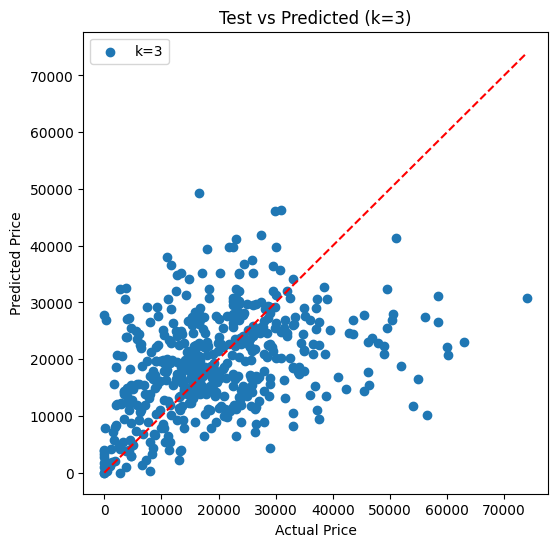

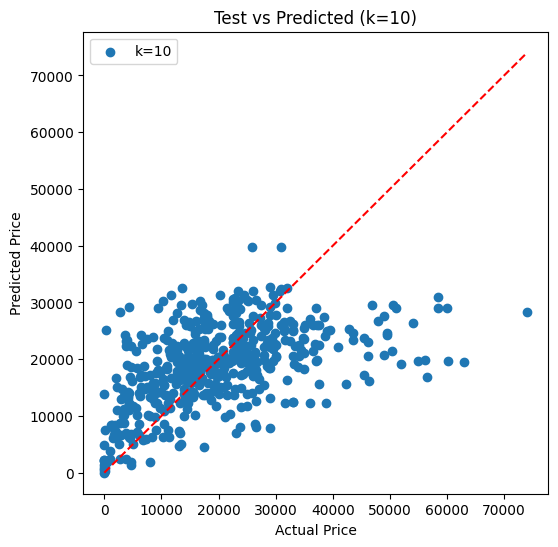

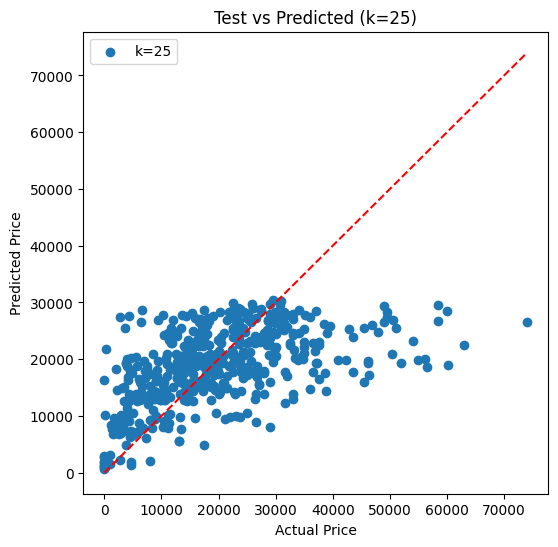

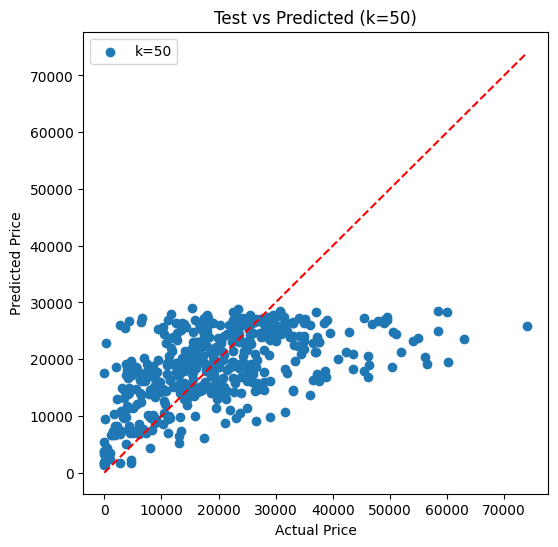

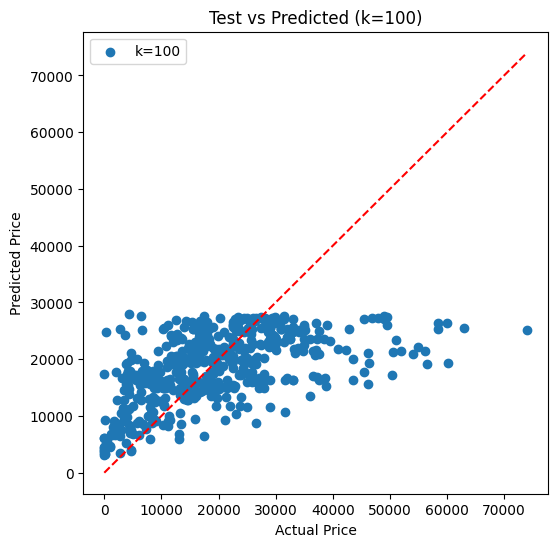

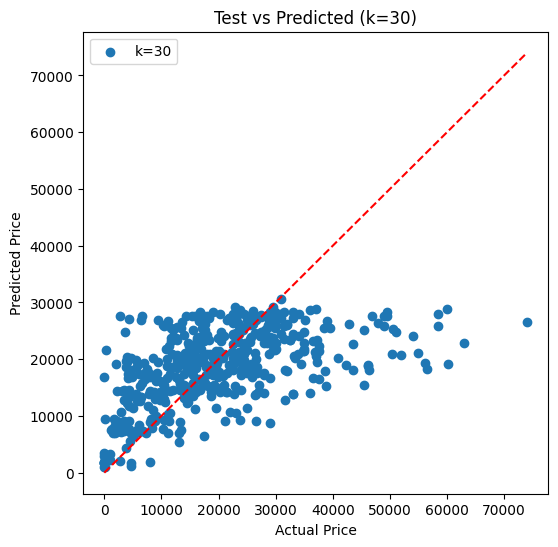

Mean Squared Error for k=3: 148065935.51955554
Mean Squared Error for k=10: 117399126.10604002
Mean Squared Error for k=25: 112576160.82390079
Mean Squared Error for k=50: 110202549.3014296
Mean Squared Error for k=100: 112253932.8184272
Mean Squared Error for k=30: 111841978.69289334


In [ ]:
#Question 2.4: K

#Import some more packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#Prepare training and evaluation data
X_train = train_df[['year', 'mileage']]
y_train = train_df['price']
X_test = eval_df[['year', 'mileage']]
y_test = eval_df['price']

#These are the values of k to test
k_values = [3, 10, 25, 50, 100, 30]

#Initialize lists to store the MSE values and predictions for each k
mse_values = []
predictions = []

#Loop over the different k values
for k in k_values:
    #Create the model + Train
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    #Make predictions on the test set
    y_pred = knn.predict(X_test)

    #Compute the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    predictions.append(y_pred)

    #Plot the actual vs predicted values for each k
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, label=f'k={k}')
    plt.title(f"Test vs Predicted (k={k})")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 45-degree line
    plt.legend()
    plt.show()

#Print the MSE values for each k
for k, mse in zip(k_values, mse_values):
    print(f'Mean Squared Error for k={k}: {mse}')

Question 2.4:

Something I noticed that was that as I increased the value of k in k-NN, the model becomes smoother, reducing overfitting for smaller values of k. However, for very large k, the model starts to underfit by oversmoothing the predictions, leading to less accurate results. The optimal k strikes a balance between capturing the data's patterns while avoiding both overfitting and underfitting.


In [ ]:
#Question 2.5: Optimal K

#The best method that I had in mind here was checking the Mean Squared Error for each k in the test set
#Here the approach I used was that the k with the lowest MSE was the most optimal k [but I am not sure if this is completely correct!!]
# Store the MSE values for each k
optimal_k = None
lowest_mse = float('inf')

#Loop over the different k values
for k in k_values:
    #Create + train model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    #Make predictions on the test set
    y_pred = knn.predict(X_test)

    #Compute the mean squared error
    mse = mean_squared_error(y_test, y_pred)

    #Update the optimal k if a lower MSE is found
    if mse < lowest_mse:
        lowest_mse = mse
        optimal_k = k

#Print the optimal K + the corresponding MSE value
print(f"The optimal value of k is {optimal_k} with a MSE of {lowest_mse}")


The optimal value of k is 50 with a MSE of 110202549.3014296


Question 2.6:

As the number of neighbors (k) in the K-nearest neighbors algorithm increases, the model transitions from overfitting to underfitting. For smaller values of k (k = 3), the model tends to overfit the training data, capturing noise and small fluctuations. This results in high variance, with predictions deviating significantly from the actual values, as seen in the scatter plots. As k increases, the model begins to generalize better, reducing the overfitting and bringing the predictions closer to the actual values. However, at larger values of k (k = 50 or 100), the model starts to underfit, becoming too simplistic and failing to capture the underlying patterns of the data, leading to higher bias. The optimal k value for this dataset appears to be around 50, where the model achieves the lowest MSE, balancing bias and variance effectively.



**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.